In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('data/house.csv')

In [3]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df1.shape

(2226382, 12)

In [5]:
df1.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [482]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [483]:
df1.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [3]:
df1.drop(['brokered_by', 'status', 'prev_sold_date'], axis=1, inplace=True)

In [4]:
df1.dropna(subset=['price', 'zip_code', 'state', 'house_size', 'acre_lot', 'city'], axis=0, inplace=True)

In [8]:
df1.shape

(1380967, 9)

In [9]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street         4116
city              0
state             0
zip_code          0
house_size        0
dtype: int64

In [5]:
df1.loc[:, 'street'] = df1['street'].ffill()

In [11]:
df1.isnull().sum()

price             0
bed           14606
bath          17681
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

In [6]:
df2 = df1[~((df1['price'] < 100000) | (df1['house_size'] < 500))]

In [7]:
df2.loc[:, 'price_sqft'] = df2['price'] / df2['house_size']

C:\Users\HP\AppData\Local\Temp\ipykernel_3836\4138949176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'price_sqft'] = df2['price'] / df2['house_size']


In [8]:
df3 = df2[~(df2['price_sqft'] < 20)]

In [9]:
df4 = df3[~(df3['bed'] * 18 + df3['bath'] * 37 > df3['house_size'])]

In [10]:
big_house_bed = df4[df4['house_size'] > 10000]['bed'].mode()[0]
big_house_bath = df4[df4['house_size'] > 10000]['bath'].mode()[0]

average_bed = df4['bed'].mode()[0]
average_bath = df4['bath'].mode()[0]

In [11]:
def fill_bed(house_size):
    if house_size > 10000:
        return big_house_bed
    else:
        return average_bed

In [12]:
def fill_bath(house_size):
    if house_size > 10000:
        return big_house_bath
    else:
        return average_bath

In [13]:
df4.loc[:, 'bed'] = df4.apply(lambda x: fill_bed(x['house_size']) if pd.isnull(x['bed']) else x['bed'], axis=1)
df4.loc[:, 'bath'] = df4.apply(lambda x: fill_bath(x['house_size']) if pd.isnull(x['bath']) else x['bath'], axis=1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'price_sqft'}>, <Axes: >]], dtype=object)

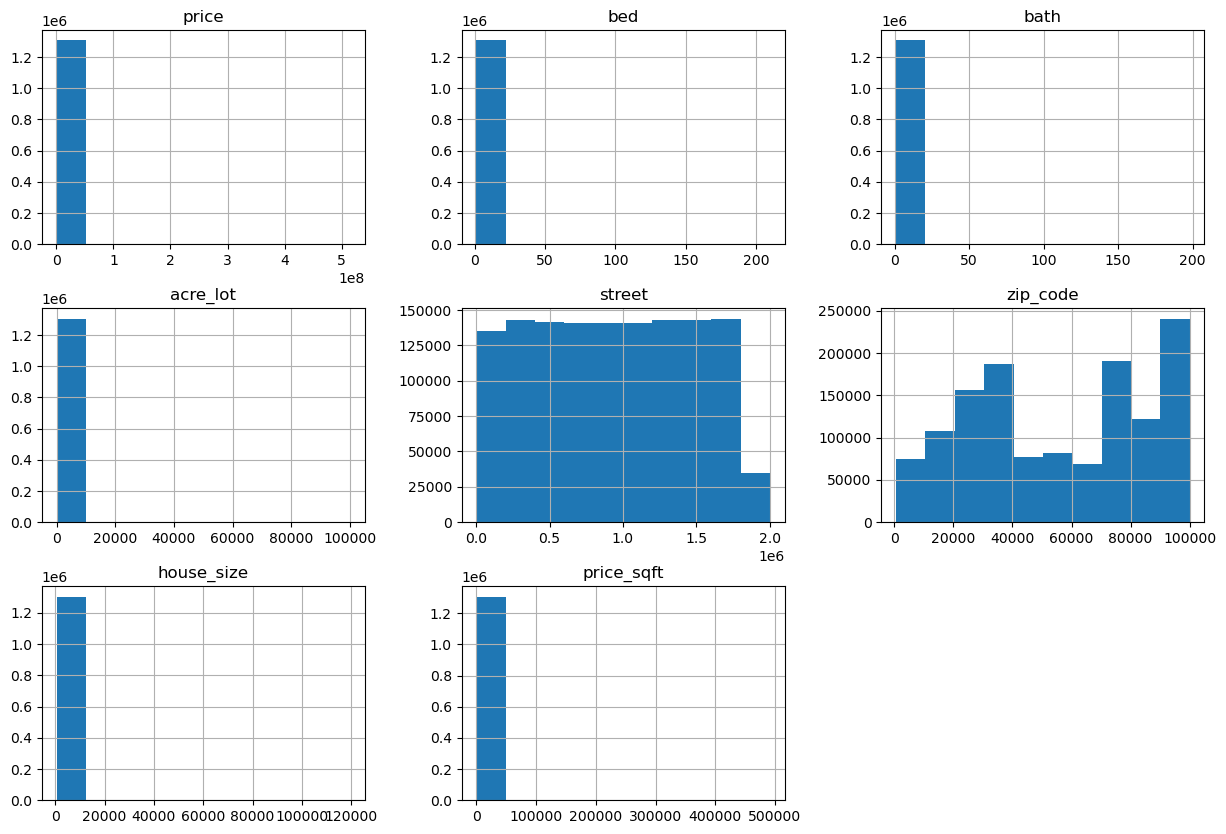

In [458]:
df4.hist(figsize=(15, 10))

In [14]:
import numpy as np

df4.loc[:, 'bed'] = np.log(df4['bed'] + 1)
df4.loc[:, 'bath'] = np.log(df4['bath'] + 1)
df4.loc[:, 'house_size'] = np.log(df4['house_size'] + 1)
df4.loc[:, 'acre_lot'] = np.log(df4['acre_lot'] + 1)
df4.loc[:, 'price_sqft'] = np.log(df4['price_sqft'] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'price_sqft'}>,
        <Axes: title={'center': 'state_average_price'}>],
       [<Axes: title={'center': 'city_average_price'}>, <Axes: >,
        <Axes: >]], dtype=object)

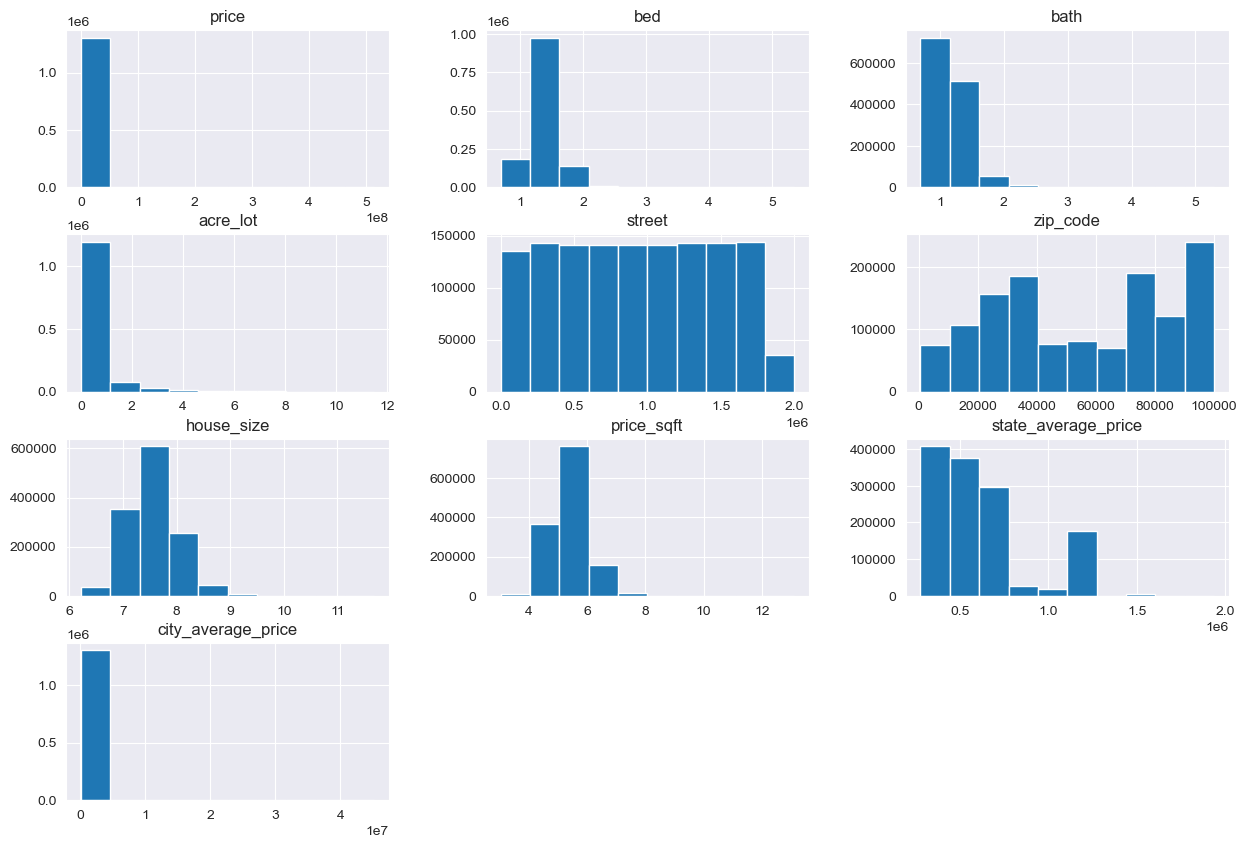

In [39]:
df4.hist(figsize=(15, 10))

<Axes: >

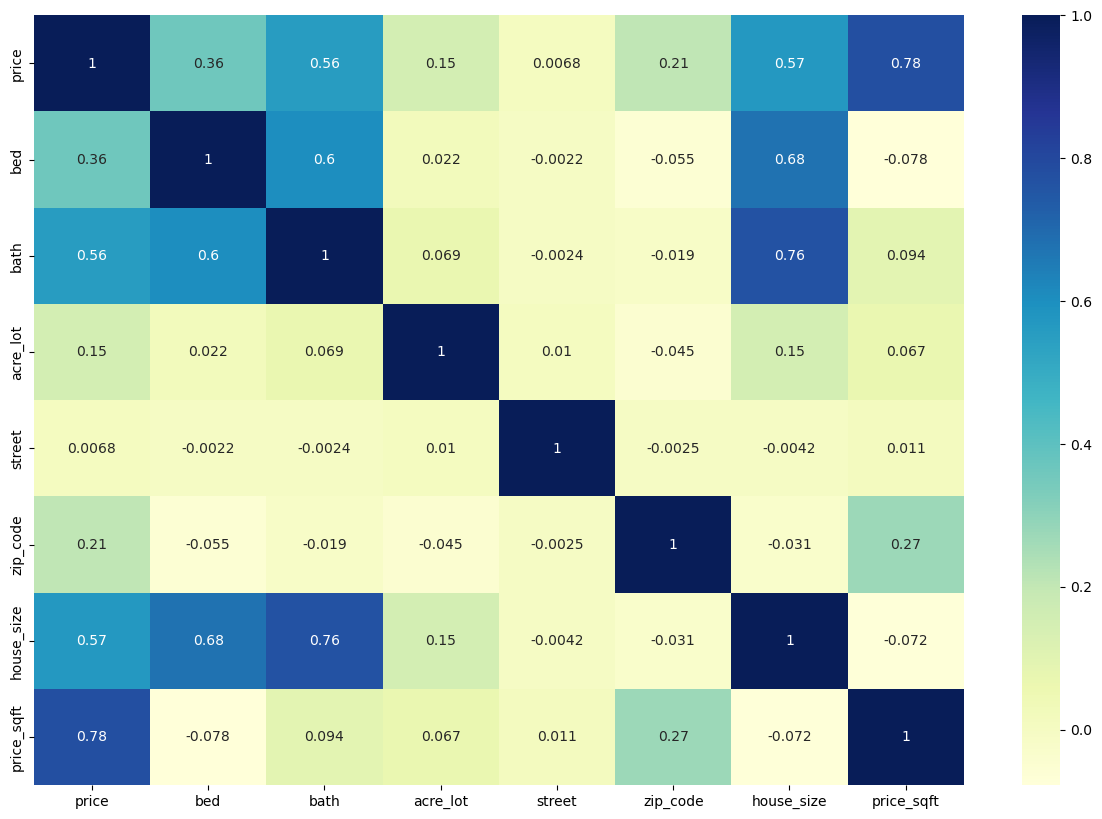

In [461]:
import seaborn as sns
import matplotlib.pyplot as plt

df5 = df4.drop(['state','city'], axis =1)
plt.figure(figsize=(15, 10))
sns.heatmap(df5.corr(), annot=True, cmap="YlGnBu")

In [15]:
state_average_price = df4.groupby('state')['price'].mean()
df4.loc[:,'state_average_price'] = df4['state'].map(state_average_price)

C:\Users\HP\AppData\Local\Temp\ipykernel_3836\1945977741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'state_average_price'] = df4['state'].map(state_average_price)


In [16]:
city_average_price = df4.groupby(['state','city'])['price'].mean()
df4['city_average_price'] = df4.apply(lambda x: city_average_price.loc[x['state'], x['city']], axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_3836\3357852126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['city_average_price'] = df4.apply(lambda x: city_average_price.loc[x['state'], x['city']], axis=1)


In [17]:
df4.drop(['state','city'], axis=1, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3836\2709090351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(['state','city'], axis=1, inplace=True)


In [35]:
from sklearn.model_selection import train_test_split

x = df4.drop('price', axis=1)
y = df4['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [38]:
reg.score(X_test, y_test)

0.4506600525602029